# 6603624

In [1]:
import apollinaire as apn
%matplotlib inline
from astropy.io import fits
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
apn.__version__

'1.0'

In [3]:
dr25 = pd.read_csv ('../tables/dr25.csv')
dr25 = dr25.set_index ('KIC')

In [4]:
kic = 6603624

r=dr25.loc[kic, 'Rad']
m=dr25.loc[kic, 'Mass']
teff=dr25.loc[kic, 'Teff']

print (kic, '>>> Teff = {:.0f} K'.format (teff), '---- M = {:.3f} Msun'.format (m), '---- R = {:.3f} Rsun'.format (r))

modDir = path.abspath ('..')
filename = glob.glob (path.join (modDir, 'data/kplr' + str(kic).zfill (9) + '*_COR_filt_inp.fits'))[0]
hdu = fits.open (filename) [0]
data = np.array (hdu.data)
t = data[:,0]
v = data[:,1]

6603624 >>> Teff = 5671 K ---- M = 1.027 Msun ---- R = 1.162 Rsun


Text(0, 0.5, 'Luminosity variation (ppm)')

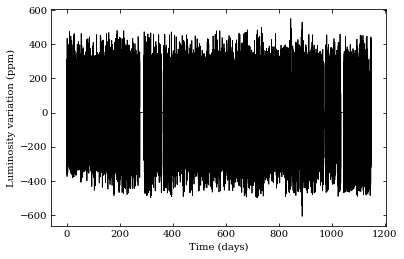

In [5]:
fig, ax = plt.subplots ()
ax.plot (t-t[0], v, color='black')

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Luminosity variation (ppm)')

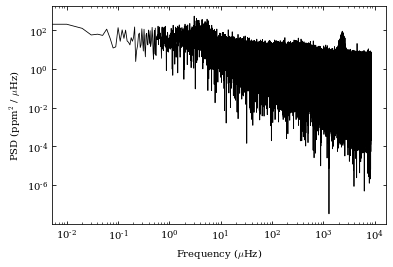

In [6]:
dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

fig, ax = plt.subplots ()
ax.plot (freq, psd, color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
ax.set_yscale ('log')
ax.set_xscale ('log')

Text(0, 0.5, 'PSD (ppm$^2$ / $\\mu$Hz)')

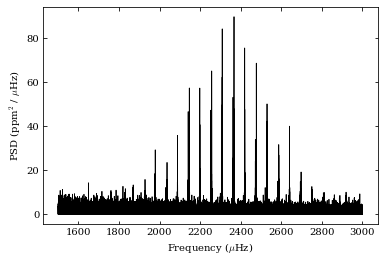

In [7]:
fig, ax = plt.subplots ()
cond = (freq>1500.)&(freq<3000.)
ax.plot (freq[cond], psd[cond], color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')

In [8]:
apn.peakbagging.stellar_framework (freq, psd, r, m, teff, n_harvey=2, low_cut=50., filename_back='background.png',
                                   filemcmc_back='mcmc_background.h5', nsteps_mcmc_back=1000, n_order=3, n_order_peakbagging=7, 
                                   filename_pattern='pattern.png', fit_l3=True, nwalkers=500, 
                                   filemcmc_pattern='mcmc_pattern.h5', nsteps_mcmc_pattern=1000, parallelise=True, 
                                   quickfit=True, num=500, discard_pkb=200, discard_pattern=250,
                                   existing_chains_back='sample', existing_chains_pattern='read', existing_chains_pkb='reset', 
                                   progress=True, a2z_file='modes_param.a2z', nopeakbagging=True,
                                   nsteps_mcmc_peakbagging=1000, filename_peakbagging='summary_peakbagging.png',
                                   fit_splittings=True, fit_angle=True, fit_amp=True, bins=30, dpi=200,
                                   format_cornerplot='png')

mcmc_background.h5 already exists, existing chains set to 'sample', sampling will restart from where it stopped.
Beginning fit


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 879/1000 [01:38<00:13,  8.85it/s]Process ForkPoolWorker-16:
Process ForkPoolWorker-5:
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 879/1000 [01:38<00:13,  8.96it/s]Process ForkPoolWorker-3:
Process ForkPoolWorker-15:
Process ForkPoolWorker-11:
Process ForkPoolWorker-2:
Process ForkPoolWorker-7:
Process ForkPoolWorker-9:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Process ForkPoolWorker-13:
Process ForkPoolWorker-6:
Process ForkPoolWorker-14:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):

Traceback (most recent call last):
Traceback (

KeyboardInterrupt: 

  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/queues.py", line 358, in get
    with self._rlock:
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/queues.py", line 358, in get
    with self._rlock:
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/queues.py", line 358, in get
    with self._rlock:
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/multiprocess/queues.py", line 358, in ge